This notebook shows that the fields satisfy:
1. The Maxwell equations inside and outside the sphere
2. The correct continuity equations at the sphere boundary

In [1]:
import sys
from src.mie import mie_int, mie_sca, vsh, pw_to_vsh, em, riccati1, riccati3, compute_fields
from math import pi
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def per_par_comps(R,E):
    """
    Inputs
    ------
    R = [N x 3] position vectors
    E = [N x 3] array of field vectors at N position vectors
    Returns
    -------
    Epar = Parallel projects
    Eper = Perpendicular projects
    """
    r = R/em.vecmag_abs(R)[:,None]
    Eper = (E*r).sum(axis=-1)
    Epar = E-r*(Eper[:,None])
    return Epar, Eper

In [3]:
# Radius of the sphere
r=0.5
# Refractive index of the sphere
n=2.+1j
#
maxL = 15
# Define an array of points along a radial line
rarray = np.linspace(0.1,0.9,200)
points = np.vstack((rarray, rarray, 0*rarray)).T
rmag = em.vecmag_abs(points)
# Define dielectric profile along the line
eps = (rmag>r).astype(float) + (rmag<=r) * n**2
# Compute fields at points generated above
E,EI = compute_fields(maxL, points, r, n, ehatINC=[[1.,0.,0.]])
# Compute the parallel and perpendicular projections
Epar,Eper = per_par_comps(points, E.T)
# Compute the displacement field : radial component only, it should be continuous
Dper = eps * Eper

n =  (2+1j) , radius =  0.5


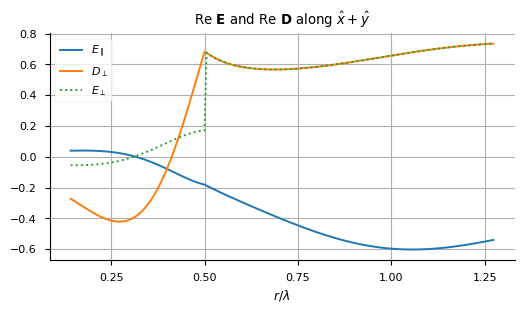

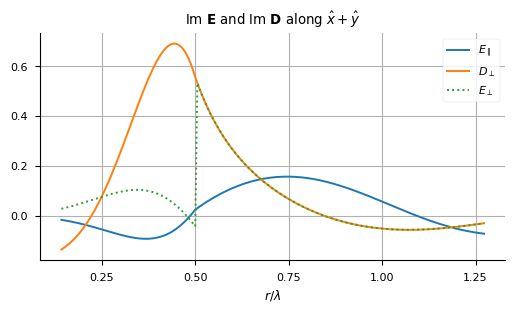

In [4]:
print('n = ',n,', radius = ',r)
with plt.style.context('seaborn-paper'):
    fig,ax=plt.subplots(figsize=(6,3),dpi=100)
    ax.plot(rmag, Epar[:,1].real, label='$E_\parallel$')
    ax.plot(rmag, Dper.real, label='$D_\perp$')
    ax.plot(rmag, Eper.real, ':',label='$E_\perp$')
    ax.set_xlabel('$r/\lambda$')
    ax.set_xticks([0.25,0.5,0.75,1.0,1.25])    
    ax.legend()
    ax.set_title('Re $\mathbf{E}$ and Re $\mathbf{D}$ along $\hat{x}+\hat{y}$')
    ax.grid(True)
    sns.despine()
    #
    fig,ax=plt.subplots(figsize=(6,3),dpi=100)
    ax.plot(rmag, Epar[:,1].imag, label='$E_\parallel$')
    ax.plot(rmag, Dper.imag, label='$D_\perp$')
    ax.plot(rmag, Eper.imag, ':',label='$E_\perp$')
    ax.set_xlabel('$r/\lambda$')
    ax.set_title('Im $\mathbf{E}$ and Im $\mathbf{D}$ along $\hat{x}+\hat{y}$')
    ax.set_xticks([0.25,0.5,0.75,1.0,1.25])    
    ax.legend()
    sns.despine()
    ax.grid(True)

Y polarization

In [5]:
# Radius of the sphere
r=0.5
# Refractive index of the sphere
n=2.+1j
#
maxL=15
# Define an array of points along a radial line
rarray = np.linspace(0.1,0.9,200)
points = np.vstack((rarray, rarray, 0*rarray)).T
rmag = em.vecmag_abs(points)
# Define dielectric profile along the line
eps = (rmag>r).astype(float) + (rmag<=r) * n**2
# Compute fields at points generated above
E,EI = compute_fields(maxL, points, r, n, ehatINC=[[0.,1.,0.]])
# Compute the parallel and perpendicular projections
Epar,Eper = per_par_comps(points, E.T)
# Compute the displacement field : radial component only, it should be continuous
Dper = eps * Eper

n =  (2+1j) , radius =  0.5


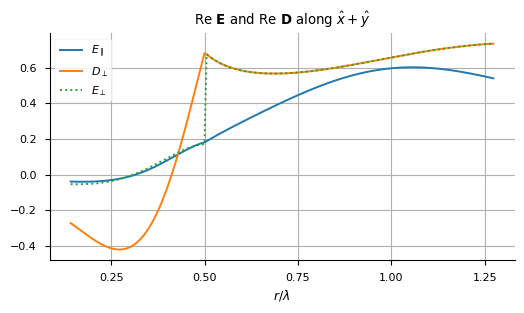

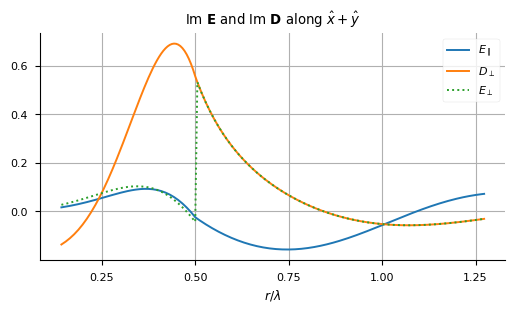

In [6]:
print('n = ',n,', radius = ',r)
with plt.style.context('seaborn-paper'):
    fig,ax=plt.subplots(figsize=(6,3),dpi=100)
    ax.plot(rmag, Epar[:,1].real, label='$E_\parallel$')
    ax.plot(rmag, Dper.real, label='$D_\perp$')
    ax.plot(rmag, Eper.real, ':',label='$E_\perp$')
    ax.set_xlabel('$r/\lambda$')
    ax.set_xticks([0.25,0.5,0.75,1.0,1.25])    
    ax.legend()
    ax.set_title('Re $\mathbf{E}$ and Re $\mathbf{D}$ along $\hat{x}+\hat{y}$')
    ax.grid(True)
    sns.despine()
    #
    fig,ax=plt.subplots(figsize=(6,3),dpi=100)
    ax.plot(rmag, Epar[:,1].imag, label='$E_\parallel$')
    ax.plot(rmag, Dper.imag, label='$D_\perp$')
    ax.plot(rmag, Eper.imag, ':',label='$E_\perp$')
    ax.set_xlabel('$r/\lambda$')
    ax.set_title('Im $\mathbf{E}$ and Im $\mathbf{D}$ along $\hat{x}+\hat{y}$')
    ax.set_xticks([0.25,0.5,0.75,1.0,1.25])    
    ax.legend()
    sns.despine()
    ax.grid(True)

## Fields satisfy Maxwell equations in the interior

In [11]:
stencil = np.array([[0.,0.,0.],[-1.,0.,0.],[1.,0.,0.],[0.,-1.,0.],[0.,1.,0.],[0.,0.,-1.],[0.,0.,1.]])
R0 = 0.1*np.array([1.,1.0,2.])
stencil

array([[ 0.,  0.,  0.],
       [-1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 0., -1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0., -1.],
       [ 0.,  0.,  1.]])

In [12]:
maxL=1
k0=2*pi
s = 0.001
points = stencil*s + R0[None,:]
E,EI = compute_fields(maxL, points, r, n, ehatINC=[[1.,1.,0.]])
E=E.T
EI=EI.T
#

In [13]:
lapE = ((E[1]+E[2]-2*E[0]) + (E[3]+E[4]-2*E[0]) + (E[5]+E[6]-2*E[0]))/s**2

In [14]:
with np.printoptions(precision=3, suppress=True):
    print(lapE)
    print(E[0] *n**2*k0**2 )

[5.908-17.316j 5.908-17.316j 1.241+15.445j]
[-5.908+17.317j -5.908+17.317j -1.241-15.445j]
